In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("bulldozer/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
len(df)

412698

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

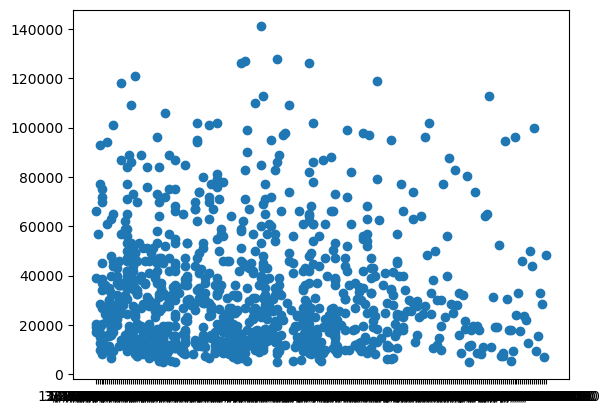

In [7]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

<Axes: ylabel='Frequency'>

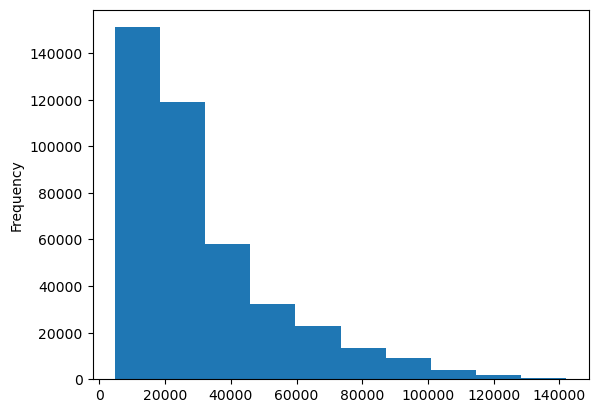

In [8]:
df.SalePrice.plot.hist()

#When we work with a time-series dataset we want to enrich dates and times as much as possible.
#We can do this by passing parse_dates

In [9]:
#Import data again but this time parse dates
df = pd.read_csv("bulldozer/bluebook-for-bulldozers/Train.csv", low_memory=False,parse_dates=["saledate"])

In [10]:
df.saledate.dtype

dtype('<M8[ns]')

In [11]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

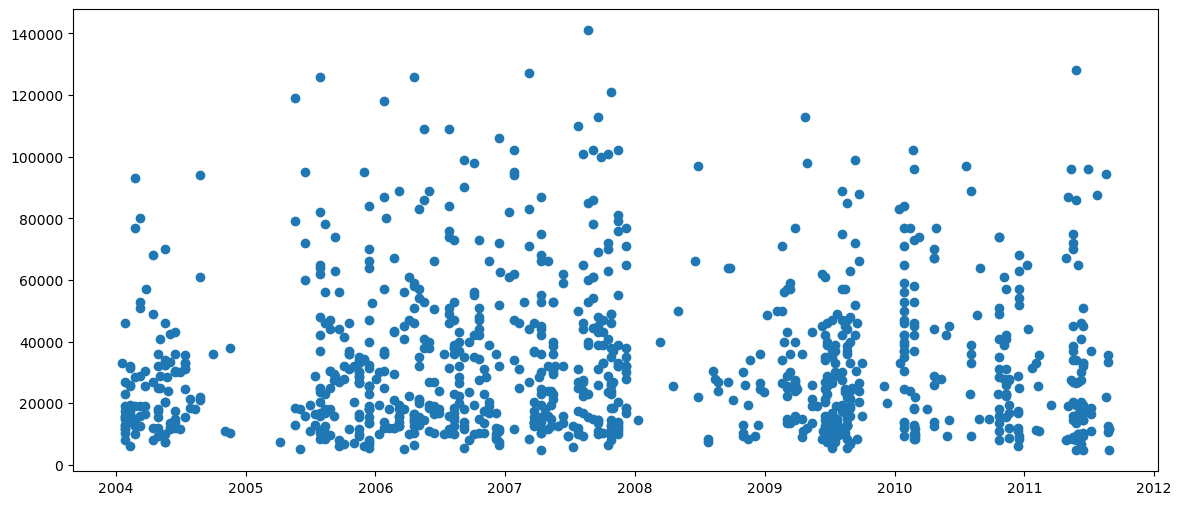

In [17]:
fig, ax = plt.subplots(figsize = (14,6))
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])



In [19]:
#Sort dataframe by saledate
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
92301    1989-01-31
63155    1989-01-31
127610   1989-01-31
128751   1989-01-31
54438    1989-01-31
127674   1989-01-31
54181    1989-01-31
280078   1989-01-31
75832    1989-01-31
119449   1989-01-31
145670   1989-01-31
28603    1989-01-31
32317    1989-01-31
204924   1989-01-31
62665    1989-01-31
28820    1989-01-31
127735   1989-01-31
168619   1989-01-31
88803    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [20]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
92301,1403418,24000,1390168,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63155,1329607,26500,1089631,4089,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
127610,1475641,23500,1194367,7277,132,99.0,1973,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
128751,1477524,10000,1078853,4103,132,99.0,1972,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN


# Make changes in a copied dataframe

In [21]:
df_tmp = df.copy()

In [22]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
92301,1403418,24000,1390168,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63155,1329607,26500,1089631,4089,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
127610,1475641,23500,1194367,7277,132,99.0,1973,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
128751,1477524,10000,1078853,4103,132,99.0,1972,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN


### Add DateTime parameters to `saledate` column

In [23]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.day_of_week
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.day_of_year

In [24]:
df_tmp.head().T

,205615,92301,63155,127610,128751
SalesID,1646770,1403418,1329607,1475641,1477524
SalePrice,9500,24000,26500,23500,10000
MachineID,1126363,1390168,1089631,1194367,1078853
ModelID,8434,7110,4089,7277,4103
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1986,1987,1973,1972
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [26]:
 #Drop the saledate column as we have made extra features with is
df_tmp.drop("saledate",axis = 1,inplace=True)

In [27]:
df_tmp.state.value_counts()

Florida           63944
Texas             51682
California        29019
Washington        15955
Georgia           14309
Maryland          12965
Mississippi       12961
Ohio              12190
Colorado          11254
Illinois          11209
New Jersey        10882
North Carolina    10404
Tennessee         10027
Alabama            9997
Pennsylvania       9941
South Carolina     9794
Arizona            9173
New York           8604
Connecticut        8128
Minnesota          7734
Missouri           6961
Nevada             6693
Louisiana          6450
Kentucky           5278
Maine              5095
Indiana            4086
Arkansas           3869
New Mexico         3529
Utah               2895
Unspecified        2801
New Hampshire      2724
Wisconsin          2668
Virginia           2288
Idaho              2018
Oregon             1775
Michigan           1763
Wyoming            1662
Montana            1327
Oklahoma           1311
Iowa               1215
West Virginia       746
Nebraska        

In [28]:
df_tmp.state.isna().sum()

0

### Converting string to categories

In [29]:
#Find the columns which contains strings
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [30]:
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [31]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 400217
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  int64   
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              380989 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  142765 non-null  float64 
 8   UsageBand                 69639 non-null   category
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  category
 12  fiModelSeries             56908 non-null   category
 13  fiModelDescriptor       

In [32]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [33]:
df_tmp.state.cat.codes

205615    43
92301      8
63155      8
127610     8
128751     8
          ..
397543    31
394261    31
395066    31
393106    31
400217    31
Length: 401125, dtype: int8

In [34]:
len(df_tmp)

401125

## Fill numerical missing values first 

In [35]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [38]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [39]:
#Fill numeric rows with median
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary column which tells us which data was missing
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            #Fill numeric values with median
            df_tmp[label] = content.fillna(content.median())

## Filling and turning categorical data to number 

In [41]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [42]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add a binary column which tells us which data was missing
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        #We are adding 1 coz pandas saves null data as -1
        df_tmp[label] = pd.Categorical(content).codes+1

In [43]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

### Building machine learning model

In [44]:
%%time
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                             random_state=42)
model.fit(df_tmp.drop("SalePrice",axis = 1),df_tmp["SalePrice"])

CPU times: total: 1h 9min 7s
Wall time: 5min 3s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [45]:
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

0.9874832144604409

In [48]:
df_val = df_tmp[df_tmp.saleYear == 2011]
df_train = df_tmp[df_tmp.saleYear != 2011]
len(df_val),len(df_train)

(35197, 365928)

In [49]:
X_train,y_train = df_train.drop("SalePrice",axis = 1),df_train.SalePrice
X_valid,y_valid = df_val.drop("SalePrice", axis =1 ),df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((365928, 102), (365928,), (35197, 102), (35197,))

### According to the task we are supposed to use root mean squared log error

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_log_error, r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training Mae": mean_absolute_error(y_train,train_preds),
             "valid Mae":mean_absolute_error(y_valid,val_preds),
             "Training rmsle":rmsle(y_train,train_preds),
             "valid rmsle":rmsle(y_valid,val_preds),
             "Training r2":r2_score(y_train,train_preds),
             "valid r2":r2_score(y_valid,val_preds)}
    return scores

In [55]:
#To reduce the time taken to train a model set max_samples
model = RandomForestRegressor(n_jobs=-1,
                             random_state = 42,
                             max_samples=20000)

In [56]:
%%time 
model.fit(X_train,y_train)

CPU times: total: 3min 53s
Wall time: 16.1 s


RandomForestRegressor(max_samples=20000, n_jobs=-1, random_state=42)

In [57]:
show_scores(model)

{'Training Mae': 4948.407976049932,
 'valid Mae': 6540.811454669432,
 'Training rmsle': 0.23488631212852812,
 'valid rmsle': 0.27173248649954834,
 'Training r2': 0.8857327062842292,
 'valid r2': 0.8329143872914885}

## Hyperparameter tuning with randomizedsearchcv

In [59]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":np.arange(10,100,10),
          "max_depth":[None,2,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2),
          "max_features":[0.1,0.5,1,"sqrt","auto"],
          "max_samples":[20000]}

rf_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                             n_iter = 2,
                             cv=5,
                             verbose = True)

rf_model.fit(X_train,y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

CPU times: total: 22.6 s
Wall time: 35.8 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 2, 3, 5, 10],
                                        'max_features': [0.1, 0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [60]:
rf_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 18,
 'min_samples_leaf': 11,
 'max_samples': 20000,
 'max_features': 0.1,
 'max_depth': 10}

In [61]:
show_scores(rf_model)

{'Training Mae': 8830.921451935503,
 'valid Mae': 9827.988626234359,
 'Training rmsle': 0.3907059847516712,
 'valid rmsle': 0.40445290183143723,
 'Training r2': 0.6853528709144824,
 'valid r2': 0.6878623594622264}

In [64]:
%%time 

#ideal model
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

ideal_model.fit(X_train,y_train)

CPU times: total: 12min
Wall time: 50.9 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [65]:
show_scores(ideal_model)

{'Training Mae': 2935.3913825403233,
 'valid Mae': 5784.13717518625,
 'Training rmsle': 0.14510565742180517,
 'valid rmsle': 0.24055243543333468,
 'Training r2': 0.9586410711169109,
 'valid r2': 0.8665181420519814}

In [67]:
df_test = pd.read_csv("bulldozer/bluebook-for-bulldozers/Test.csv",parse_dates=["saledate"])
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


### Preprocessing the test dataset-
    Getting the test dataset to the same format as train dataset

In [70]:
def preprocess_data(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.day_of_week
    df["saleDayOfYear"] = df.saledate.dt.day_of_year
    df.drop("saledate",axis = 1,inplace=True)
    
    #Fill numeric rows with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #Add a binary column which tells us which data was missing
                df[label+"_is_missing"] = pd.isnull(content)
                #Fill numeric values with median
                df[label] = content.fillna(content.median())
            
    #Turn categories to numbers
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            #Add a binary column which tells us which data was missing
            df[label+"_is_missing"] = pd.isnull(content)
            #We are adding 1 coz pandas saves null data as -1
            df[label] = pd.Categorical(content).codes+1
            
    return df

In [71]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [72]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [73]:
#Manually adjust auctioneerid
df_test["auctioneerID_is_missing"] = False
df_test = df_test.reindex(columns = list(X_train.columns))
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [74]:
test_preds = ideal_model.predict(df_test)

In [75]:
#Format predictions to same format kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,16793.256594
1,1227844,16714.695879
2,1227847,48420.959458
3,1227848,65426.471053
4,1227863,55406.205380
...,...,...
12452,6643171,38777.151854
12453,6643173,11228.731474
12454,6643184,13157.391062
12455,6643186,16012.954693


In [76]:
#Finding feature importance of our best model
ideal_model.feature_importances_

array([3.90834915e-02, 1.77511714e-02, 4.59725279e-02, 1.38945505e-03,
       3.45722699e-03, 2.10858432e-01, 2.69514858e-03, 8.70607422e-04,
       4.95731598e-02, 4.89229745e-02, 6.16878426e-02, 4.61337821e-03,
       1.42124405e-02, 1.55610894e-01, 4.14039754e-02, 6.02245909e-03,
       2.54477517e-03, 1.40701276e-03, 4.59513002e-03, 4.32597778e-02,
       8.86289646e-04, 4.41533753e-04, 7.19961078e-04, 1.62580357e-04,
       1.49174772e-03, 2.41333506e-05, 1.30429471e-04, 1.06250529e-02,
       8.23860739e-04, 1.01688340e-04, 4.76069380e-03, 1.86249811e-03,
       4.33936495e-03, 4.82291760e-04, 6.10131885e-04, 5.81819390e-03,
       7.57767797e-04, 1.35855834e-02, 1.72256172e-03, 2.32824580e-03,
       6.85136370e-04, 1.05360728e-03, 1.20605730e-03, 5.87917946e-04,
       4.38448124e-04, 4.02790736e-04, 3.63352316e-04, 3.24379957e-03,
       7.84861567e-04, 2.04382458e-04, 1.64936818e-04, 7.57338741e-02,
       3.90831697e-03, 5.61366605e-03, 2.92067657e-03, 1.02214094e-02,
      

In [79]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

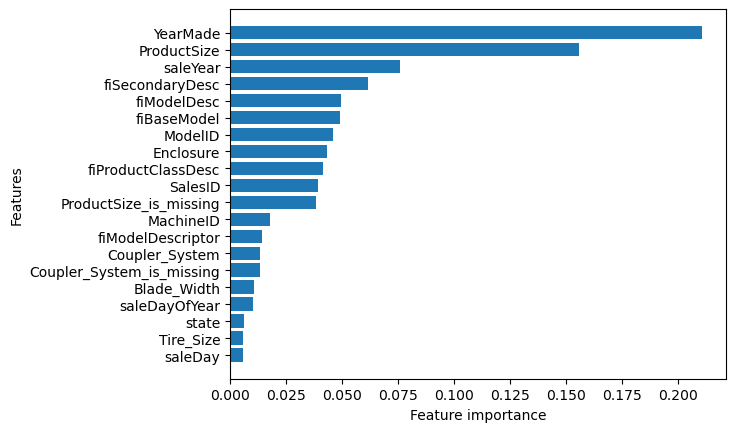

In [80]:
plot_features(X_train.columns,ideal_model.feature_importances_)